In [1]:
from metabolomics_analysis_tools.data_preprocessing import data_reading as dr

from metabolomics_analysis_tools.data_preprocessing import  normalization as dn

from metabolomics_analysis_tools.stats_analyses import analyses as an

import metabolomics_analysis_tools.data_preprocessing.scaling as sl

import metabolomics_analysis_tools.data_preprocessing.data_check as dc

In [11]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

def PCA_analysis(normalized_data, number_of_components=2):
    """
    Perform PCA analysis on the data

    Args:
        input_data (pandas.DataFrame): Dataframe containing the data
        number_of_components (int, optional): Number of principal components to return. Defaults to 2.

    Returns:
        pandas.DataFrame: Dataframe containing the principal components
    """
    normalized_data = normalized_data.iloc[:, 2:]
    # Initialize PCA object with desired number of components
    pca = PCA(n_components=number_of_components)

    # Fit the PCA model to the data
    pca.fit(normalized_data)

    # perform PCA on the DataFrame
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(normalized_data)

    # get the percentage of variance explained by each principal component
    variance_explained = pca.explained_variance_ratio_

    # create a new DataFrame with the principal components
    principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])

    # create a LabelEncoder to encode the groups as integers
    le = LabelEncoder()
    groups = normalized_data.iloc[:, 1]
    groups_encoded = le.fit_transform(groups)

    # create a colormap based on the number of unique groups
    cmap = plt.cm.get_cmap('viridis', len(np.unique(groups_encoded)))

    # create a scatter plot of the principal components with annotations and colors based on groups
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel(
        "Principal Component 1\nVariance explained: {:.2f}%".format(
            variance_explained[0] * 100
        ),
        fontsize=15,
    )
    ax.set_ylabel(
        "Principal Component 2\nVariance explained: {:.2f}%".format(
            variance_explained[1] * 100
        ),
        fontsize=15,
    )
    ax.set_title("2 Component PCA", fontsize=20)

    ax.scatter(principal_df["PC1"], principal_df["PC2"], s=50, c=cmap(groups_encoded))

    return principal_df


In [2]:
df=dr.read_data_file(file_path='resources/test_dataset/cow_diet.csv')
df = df.replace(0, 0.0001)
normalized_data=dn.normalize_by_median(df)
normalized_data.head()

data read successfully
the shape of the dataframe is:  (39, 49)


,Sample,Diet,"1,3-D",3-HB,3-HP,3-PP,Acetate,Acetoacetate,Alanine,Aspartate,...,Ribose,Succinate,Tyrosine,Uracil,Valerate,Valine,Xanthine,Endotoxin,Glucose,Fumarate
0,0_1_1,0,0.416667,0.000002,0.273171,0.935349,0.927099,0.231047,0.283101,0.469754,...,0.448735,0.522180,0.430180,0.311304,0.414616,0.262243,0.265170,0.478045,0.393885,1.0
1,0_1_3,0,0.383333,0.979466,0.868293,1.393295,1.168055,0.935018,0.474419,1.000000,...,0.476698,0.443599,0.686937,0.456812,0.695212,0.604265,0.449709,0.410936,0.688849,1.0
2,0_1_5,0,0.550000,0.702259,0.458537,1.087698,0.832219,0.364621,0.268217,0.710232,...,0.422104,0.595691,0.454955,0.248116,0.426837,0.349131,0.468828,0.451533,0.345324,41000.0
3,0_1_7,0,0.683333,0.613963,0.207317,0.947321,0.858490,0.454874,0.332713,0.416729,...,0.691079,0.576679,0.191441,0.244638,0.208530,0.283570,0.433915,0.438277,0.239209,24000.0
4,0_1_10,0,1.816667,0.872690,1.239024,2.036516,1.128193,0.994585,0.768682,1.336072,...,1.923657,1.264892,1.265766,0.764058,0.514835,0.628752,1.000000,0.449876,0.598921,99000.0


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

def PCA_analysis(normalized_data, number_of_components=2):
    data_to_process = normalized_data.iloc[:, 2:]
    pca = PCA(n_components=number_of_components)
    principal_components = pca.fit_transform(data_to_process)
    principal_df = pd.DataFrame(
        data=principal_components, columns=[f"PC {i+1}" for i in range(number_of_components)]
    )
    groups = normalized_data.iloc[:, 1]

    # Create a LabelEncoder to encode the groups as integers
    le = LabelEncoder()
    groups_encoded = le.fit_transform(groups)

    # Create a colormap based on the number of unique groups
    cmap = plt.cm.get_cmap('viridis', len(np.unique(groups_encoded)))

    fig, ax = plt.subplots()
    scatter = ax.scatter(
        principal_df["PC 1"], principal_df["PC 2"], c=groups_encoded, cmap=cmap
    )

    # Create a legend with the group labels
    legend_elements = [plt.Line2D([0], [0], marker='o', color=cmap(i), label=label, markersize=7, linestyle='')
                       for i, label in enumerate(le.classes_)]
    legend1 = ax.legend(handles=legend_elements, title="Groups")
    ax.add_artist(legend1)
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")
    ax.set_title("PCA of Metabolomic Data")

    return fig


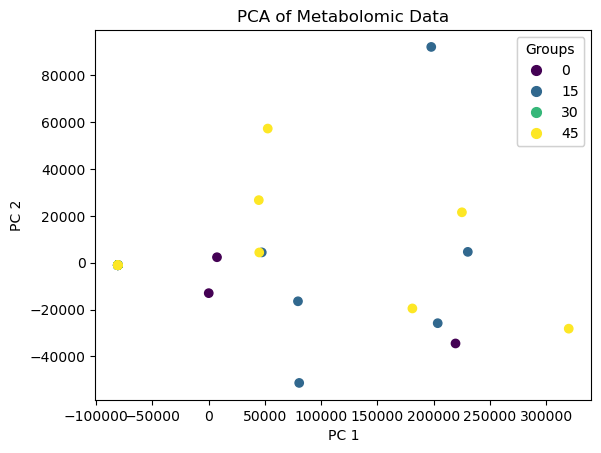

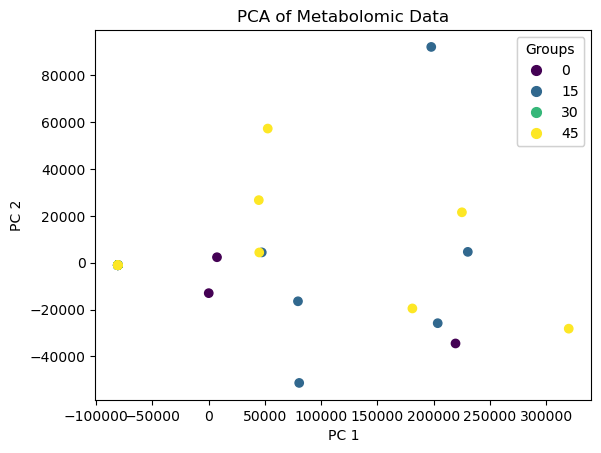

In [6]:
PCA_analysis(normalized_data)

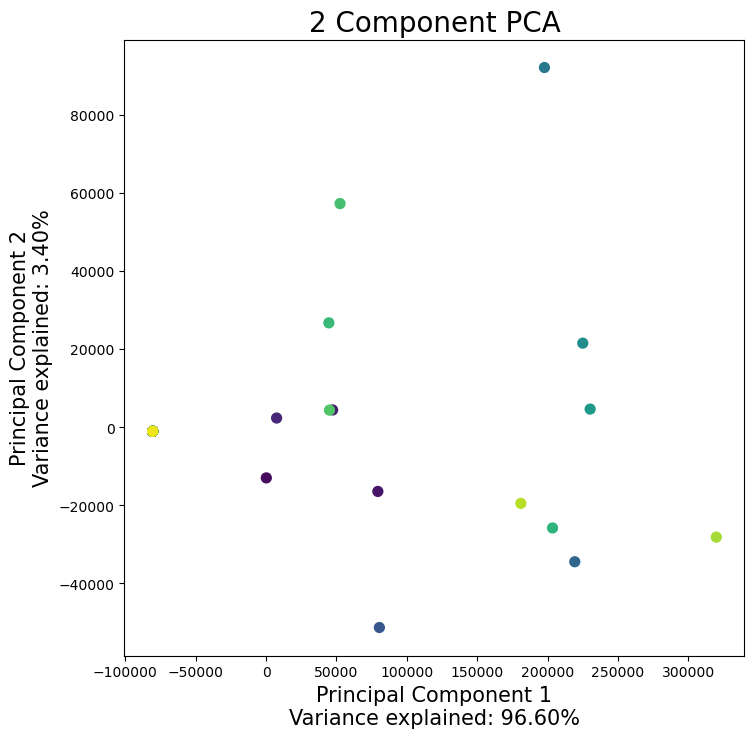

In [12]:
principal_components=PCA_analysis(normalized_data)

#install dependencies

In [5]:
df=dp.data_reading.read_data_file()

data read successfully
the shape of the dataframe is:  (77, 65)


In [6]:
normalized_data=nr.normalize_by_median(df)

In [12]:
normalized_data

,Patient ID,Muscle loss,"1,6-Anhydro-beta-D-glucose",1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
0,PIF_178,cachexic,0.895833,1.786066,1.78551,0.802526,1.296827,65.355408,4.857265,0.80239,...,5.529262,4.806596,4.054399,2.611413,1.433333,1.84049,1.733197,1.935171,0.970442,2.339494
1,PIF_087,cachexic,1.363596,9.299454,2.315539,1.284042,1.221396,5.154525,3.745299,6.361753,...,1.768461,2.773285,1.71559,3.319746,3.819048,2.585801,4.806415,8.085693,1.896484,1.896391
2,PIF_090,cachexic,5.930482,1.768306,1.161106,2.013863,0.431732,0.631347,0.482051,1.859761,...,1.750798,1.0,1.150055,1.78593,42.94881,2.560068,1.105162,2.181818,0.895806,1.221333
3,NETL_005_V1,cachexic,3.3875,1.447541,16.43756,2.293284,21.757208,24.528477,15.035043,1.994422,...,5.003192,5.365595,1.116101,3.095109,2.484325,14.440474,3.158063,2.829359,1.537287,3.706054
4,PIF_115,cachexic,0.486842,2.013661,1.490944,2.585644,0.600544,1.309934,6.55641,5.530677,...,2.203448,2.363109,1.615918,4.854167,3.706151,0.786622,9.582801,3.669523,0.522015,1.161816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NETCR_019_V2,control,0.771053,1.433333,1.322212,1.363524,1.803808,9.20574,0.961538,0.517131,...,0.980209,0.74826,2.270172,1.009964,1.246032,0.802511,1.0,0.676975,5.36554,1.233556
73,NETL_012_V1,control,0.371711,0.431694,1.0,0.690696,1.138713,0.481678,0.594872,0.275697,...,0.453926,0.353497,1.138737,0.398551,0.28373,0.280809,0.148096,0.458271,0.329577,0.650466
74,NETL_012_V2,control,0.205921,0.382787,0.491897,0.726124,0.85204,0.588521,0.286325,0.214343,...,0.316663,0.251574,1.447609,0.414855,0.431746,0.316618,0.394582,0.316692,0.554344,0.410652
75,NETL_003_V1,control,0.826974,0.496448,2.483317,0.463031,0.423209,1.476821,0.517094,0.419124,...,0.371568,0.49652,0.49142,0.440519,0.733532,0.704697,0.225403,0.463115,5.528973,1.309953


In [8]:
type(normalized_data)

pandas.core.frame.DataFrame

In [7]:
data_scaled=sl.data_scaling_mean_centered(normalized_data)

/Users/yuzhijian/opt/anaconda3/lib/python3.9/site-packages/metabolomics_analysis_tools/data_preprocessing/scaling.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_scaled = normalized_data.iloc[:,2:].subtract(normalized_data.mean(axis=0), axis=1)


In [8]:
data_scaled

,Patient ID,Muscle loss,"1,6-Anhydro-beta-D-glucose",1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
0,PIF_178,cachexic,-1.420623,-0.169498,0.054362,-0.34506,-1.333946,61.966606,3.00111,-0.922533,...,4.119534,3.451653,2.756201,1.53451,-0.569313,0.257636,0.003098,0.421371,-1.309799,1.034388
1,PIF_087,cachexic,-0.952859,7.34389,0.584391,0.136456,-1.409377,1.765723,1.889144,4.636829,...,0.358733,1.418342,0.417391,2.242844,1.816401,1.002947,3.076316,6.571893,-0.383757,0.591285
2,PIF_090,cachexic,3.614027,-0.187258,-0.570042,0.866277,-2.199042,-2.757455,-1.374104,0.134837,...,0.34107,-0.354943,-0.148144,0.709027,40.946163,0.977215,-0.624937,0.668018,-1.384434,-0.083773
3,NETL_005_V1,cachexic,1.071044,-0.508023,14.706412,1.145698,19.126434,21.139675,13.178888,0.269499,...,3.593464,4.010652,-0.182098,2.018206,0.481679,12.857621,1.427964,1.315559,-0.742954,2.400948
4,PIF_115,cachexic,-1.829614,0.058097,-0.240204,1.438058,-2.030229,-2.078868,4.700255,3.805754,...,0.79372,1.008166,0.31772,3.777264,1.703504,-0.796231,7.852702,2.155723,-1.758226,-0.14329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NETCR_019_V2,control,-1.545403,-0.522231,-0.408936,0.215938,-0.826965,5.816938,-0.894616,-1.207792,...,-0.429519,-0.606683,0.971973,-0.066939,-0.756615,-0.780342,-0.730099,-0.836825,3.085299,-0.07155
73,NETL_012_V1,control,-1.944745,-1.52387,-0.731148,-0.45689,-1.492061,-2.907124,-1.261283,-1.449226,...,-0.955802,-1.001446,-0.159462,-0.678352,-1.718916,-1.302044,-1.582003,-1.055529,-1.950664,-0.65464
74,NETL_012_V2,control,-2.110535,-1.572777,-1.239251,-0.421462,-1.778733,-2.800281,-1.56983,-1.510581,...,-1.093065,-1.103369,0.14941,-0.662047,-1.5709,-1.266236,-1.335517,-1.197108,-1.725896,-0.894454
75,NETL_003_V1,control,-1.489482,-1.459116,0.75217,-0.684555,-2.207564,-1.911981,-1.339061,-1.3058,...,-1.03816,-0.858423,-0.806778,-0.636383,-1.269115,-0.878156,-1.504696,-1.050685,3.248733,0.004847


In [18]:

data_scaled = normalized_data.iloc[:,2:].subtract(normalized_data.mean(axis=0), axis=1)



/var/folders/mg/5636bm150pnfpzs4pk6rc0y40000gn/T/ipykernel_90331/3412463270.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_scaled = normalized_data.iloc[:,2:].subtract(normalized_data.mean(axis=0), axis=1)


In [19]:
data_scaled

,"1,6-Anhydro-beta-D-glucose",1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
0,-1.420623,-0.169498,0.054362,-0.34506,-1.333946,61.966606,3.00111,-0.922533,2.415613,0.118085,...,4.119534,3.451653,2.756201,1.53451,-0.569313,0.257636,0.003098,0.421371,-1.309799,1.034388
1,-0.952859,7.34389,0.584391,0.136456,-1.409377,1.765723,1.889144,4.636829,1.040275,4.573655,...,0.358733,1.418342,0.417391,2.242844,1.816401,1.002947,3.076316,6.571893,-0.383757,0.591285
2,3.614027,-0.187258,-0.570042,0.866277,-2.199042,-2.757455,-1.374104,0.134837,3.098388,2.580644,...,0.34107,-0.354943,-0.148144,0.709027,40.946163,0.977215,-0.624937,0.668018,-1.384434,-0.083773
3,1.071044,-0.508023,14.706412,1.145698,19.126434,21.139675,13.178888,0.269499,1.337921,1.466823,...,3.593464,4.010652,-0.182098,2.018206,0.481679,12.857621,1.427964,1.315559,-0.742954,2.400948
4,-1.829614,0.058097,-0.240204,1.438058,-2.030229,-2.078868,4.700255,3.805754,-0.369432,-0.206975,...,0.79372,1.008166,0.31772,3.777264,1.703504,-0.796231,7.852702,2.155723,-1.758226,-0.14329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,-1.545403,-0.522231,-0.408936,0.215938,-0.826965,5.816938,-0.894616,-1.207792,-0.273618,-0.424348,...,-0.429519,-0.606683,0.971973,-0.066939,-0.756615,-0.780342,-0.730099,-0.836825,3.085299,-0.07155
73,-1.944745,-1.52387,-0.731148,-0.45689,-1.492061,-2.907124,-1.261283,-1.449226,-0.380887,-1.148496,...,-0.955802,-1.001446,-0.159462,-0.678352,-1.718916,-1.302044,-1.582003,-1.055529,-1.950664,-0.65464
74,-2.110535,-1.572777,-1.239251,-0.421462,-1.778733,-2.800281,-1.56983,-1.510581,-0.948478,-1.070476,...,-1.093065,-1.103369,0.14941,-0.662047,-1.5709,-1.266236,-1.335517,-1.197108,-1.725896,-0.894454
75,-1.489482,-1.459116,0.75217,-0.684555,-2.207564,-1.911981,-1.339061,-1.3058,-0.78622,-0.947383,...,-1.03816,-0.858423,-0.806778,-0.636383,-1.269115,-0.878156,-1.504696,-1.050685,3.248733,0.004847


In [23]:
data_scaled = normalized_data.iloc[:,2:].subtract(normalized_data.mean(axis=0), axis=1)
scaled_data=normalized_data.copy()
scaled_data.iloc[:,2:]=data_scaled


In [24]:
scaled_data

,Patient ID,Muscle loss,"1,6-Anhydro-beta-D-glucose",1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
0,PIF_178,cachexic,-1.420623,-0.169498,0.054362,-0.34506,-1.333946,61.966606,3.00111,-0.922533,...,4.119534,3.451653,2.756201,1.53451,-0.569313,0.257636,0.003098,0.421371,-1.309799,1.034388
1,PIF_087,cachexic,-0.952859,7.34389,0.584391,0.136456,-1.409377,1.765723,1.889144,4.636829,...,0.358733,1.418342,0.417391,2.242844,1.816401,1.002947,3.076316,6.571893,-0.383757,0.591285
2,PIF_090,cachexic,3.614027,-0.187258,-0.570042,0.866277,-2.199042,-2.757455,-1.374104,0.134837,...,0.34107,-0.354943,-0.148144,0.709027,40.946163,0.977215,-0.624937,0.668018,-1.384434,-0.083773
3,NETL_005_V1,cachexic,1.071044,-0.508023,14.706412,1.145698,19.126434,21.139675,13.178888,0.269499,...,3.593464,4.010652,-0.182098,2.018206,0.481679,12.857621,1.427964,1.315559,-0.742954,2.400948
4,PIF_115,cachexic,-1.829614,0.058097,-0.240204,1.438058,-2.030229,-2.078868,4.700255,3.805754,...,0.79372,1.008166,0.31772,3.777264,1.703504,-0.796231,7.852702,2.155723,-1.758226,-0.14329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NETCR_019_V2,control,-1.545403,-0.522231,-0.408936,0.215938,-0.826965,5.816938,-0.894616,-1.207792,...,-0.429519,-0.606683,0.971973,-0.066939,-0.756615,-0.780342,-0.730099,-0.836825,3.085299,-0.07155
73,NETL_012_V1,control,-1.944745,-1.52387,-0.731148,-0.45689,-1.492061,-2.907124,-1.261283,-1.449226,...,-0.955802,-1.001446,-0.159462,-0.678352,-1.718916,-1.302044,-1.582003,-1.055529,-1.950664,-0.65464
74,NETL_012_V2,control,-2.110535,-1.572777,-1.239251,-0.421462,-1.778733,-2.800281,-1.56983,-1.510581,...,-1.093065,-1.103369,0.14941,-0.662047,-1.5709,-1.266236,-1.335517,-1.197108,-1.725896,-0.894454
75,NETL_003_V1,control,-1.489482,-1.459116,0.75217,-0.684555,-2.207564,-1.911981,-1.339061,-1.3058,...,-1.03816,-0.858423,-0.806778,-0.636383,-1.269115,-0.878156,-1.504696,-1.050685,3.248733,0.004847


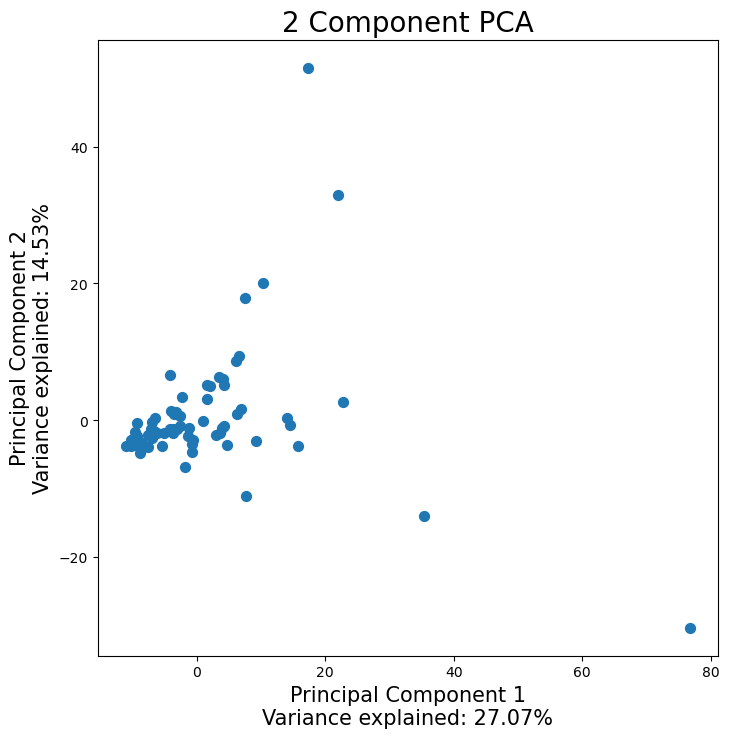

In [25]:
pca_plot=an.PCA_analysis(scaled_data)

/Users/yuzhijian/opt/anaconda3/lib/python3.9/site-packages/metabolomics_analysis_tools/stats_analyses/analyses.py:110: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cachexic_mean = grouped_data[grouped_data['Muscle loss'] == 'cachexic'].iloc[:, 1:].mean()
/Users/yuzhijian/opt/anaconda3/lib/python3.9/site-packages/metabolomics_analysis_tools/stats_analyses/analyses.py:111: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  control_mean = grouped_data[grouped_data['Muscle loss'] == 'control'].iloc[:, 1:].mean()
/Users/yuzhijian/opt/anaco

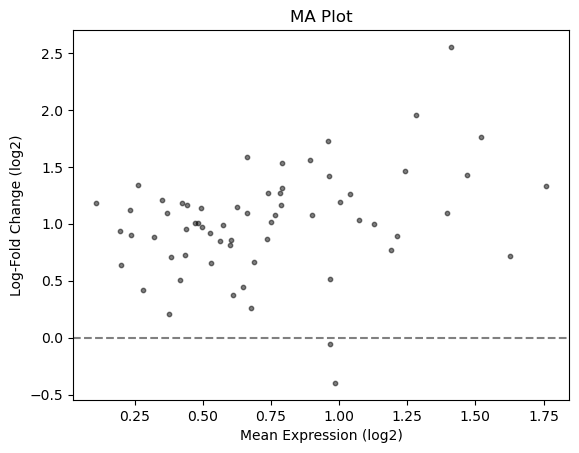

In [13]:
ma_plot=an.ma_plot(normalized_data)

/Users/yuzhijian/opt/anaconda3/lib/python3.9/site-packages/metabolomics_analysis_tools/stats_analyses/analyses.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data.iloc[:, 1:] = grouped_data.iloc[:, 1:].astype(float)
/Users/yuzhijian/opt/anaconda3/lib/python3.9/site-packages/metabolomics_analysis_tools/stats_analyses/analyses.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_grouped_data = result_grouped_data.append({
/Users/yuzhijian/opt/anaconda3/lib/python3.9/site-packages/metabolomics_analysis_tools/stats_analyses/analyses.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_grouped_data = resu

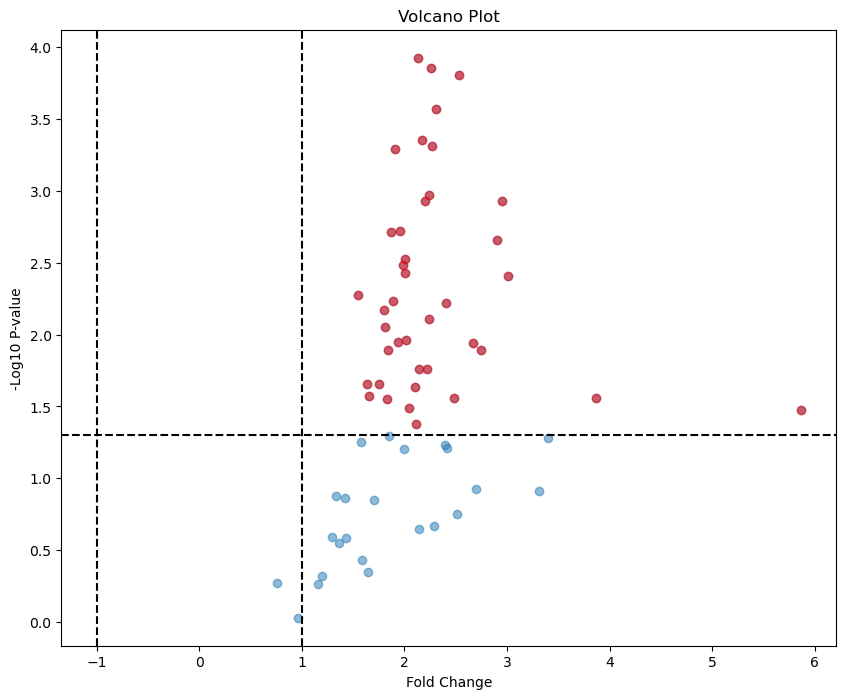

In [14]:
volcano_plot=an.volcano_plot(normalized_data)

In [134]:
#test data reading function
data=dr.read_data_file()

data read successfully
the shape of the dataframe is:  (77, 65)


In [135]:
data_to_process=data.iloc[:,2:]
data_to_process= data_to_process.astype({col: float for col in data_to_process.columns})
normalized_data=data_to_process.div(data_to_process.median(axis=0), axis=1)
normalized_data

,"1,6-Anhydro-beta-D-glucose",1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
0,0.895833,1.786066,1.785510,0.802526,1.296827,65.355408,4.857265,0.802390,3.935291,1.715875,...,5.529262,4.806596,4.054399,2.611413,1.433333,1.840490,1.733197,1.935171,0.970442,2.339494
1,1.363596,9.299454,2.315539,1.284042,1.221396,5.154525,3.745299,6.361753,2.559953,6.171445,...,1.768461,2.773285,1.715590,3.319746,3.819048,2.585801,4.806415,8.085693,1.896484,1.896391
2,5.930482,1.768306,1.161106,2.013863,0.431732,0.631347,0.482051,1.859761,4.618066,4.178434,...,1.750798,1.000000,1.150055,1.785930,42.948810,2.560068,1.105162,2.181818,0.895806,1.221333
3,3.387500,1.447541,16.437560,2.293284,21.757208,24.528477,15.035043,1.994422,2.857599,3.064613,...,5.003192,5.365595,1.116101,3.095109,2.484325,14.440474,3.158063,2.829359,1.537287,3.706054
4,0.486842,2.013661,1.490944,2.585644,0.600544,1.309934,6.556410,5.530677,1.150246,1.390814,...,2.203448,2.363109,1.615918,4.854167,3.706151,0.786622,9.582801,3.669523,0.522015,1.161816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.771053,1.433333,1.322212,1.363524,1.803808,9.205740,0.961538,0.517131,1.246060,1.173442,...,0.980209,0.748260,2.270172,1.009964,1.246032,0.802511,1.000000,0.676975,5.365540,1.233556
73,0.371711,0.431694,1.000000,0.690696,1.138713,0.481678,0.594872,0.275697,1.138791,0.449294,...,0.453926,0.353497,1.138737,0.398551,0.283730,0.280809,0.148096,0.458271,0.329577,0.650466
74,0.205921,0.382787,0.491897,0.726124,0.852040,0.588521,0.286325,0.214343,0.571200,0.527314,...,0.316663,0.251574,1.447609,0.414855,0.431746,0.316618,0.394582,0.316692,0.554344,0.410652
75,0.826974,0.496448,2.483317,0.463031,0.423209,1.476821,0.517094,0.419124,0.733458,0.650407,...,0.371568,0.496520,0.491420,0.440519,0.733532,0.704697,0.225403,0.463115,5.528973,1.309953


In [136]:
normalized_data

,"1,6-Anhydro-beta-D-glucose",1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
0,0.895833,1.786066,1.785510,0.802526,1.296827,65.355408,4.857265,0.802390,3.935291,1.715875,...,5.529262,4.806596,4.054399,2.611413,1.433333,1.840490,1.733197,1.935171,0.970442,2.339494
1,1.363596,9.299454,2.315539,1.284042,1.221396,5.154525,3.745299,6.361753,2.559953,6.171445,...,1.768461,2.773285,1.715590,3.319746,3.819048,2.585801,4.806415,8.085693,1.896484,1.896391
2,5.930482,1.768306,1.161106,2.013863,0.431732,0.631347,0.482051,1.859761,4.618066,4.178434,...,1.750798,1.000000,1.150055,1.785930,42.948810,2.560068,1.105162,2.181818,0.895806,1.221333
3,3.387500,1.447541,16.437560,2.293284,21.757208,24.528477,15.035043,1.994422,2.857599,3.064613,...,5.003192,5.365595,1.116101,3.095109,2.484325,14.440474,3.158063,2.829359,1.537287,3.706054
4,0.486842,2.013661,1.490944,2.585644,0.600544,1.309934,6.556410,5.530677,1.150246,1.390814,...,2.203448,2.363109,1.615918,4.854167,3.706151,0.786622,9.582801,3.669523,0.522015,1.161816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.771053,1.433333,1.322212,1.363524,1.803808,9.205740,0.961538,0.517131,1.246060,1.173442,...,0.980209,0.748260,2.270172,1.009964,1.246032,0.802511,1.000000,0.676975,5.365540,1.233556
73,0.371711,0.431694,1.000000,0.690696,1.138713,0.481678,0.594872,0.275697,1.138791,0.449294,...,0.453926,0.353497,1.138737,0.398551,0.283730,0.280809,0.148096,0.458271,0.329577,0.650466
74,0.205921,0.382787,0.491897,0.726124,0.852040,0.588521,0.286325,0.214343,0.571200,0.527314,...,0.316663,0.251574,1.447609,0.414855,0.431746,0.316618,0.394582,0.316692,0.554344,0.410652
75,0.826974,0.496448,2.483317,0.463031,0.423209,1.476821,0.517094,0.419124,0.733458,0.650407,...,0.371568,0.496520,0.491420,0.440519,0.733532,0.704697,0.225403,0.463115,5.528973,1.309953


In [137]:
data

,Patient ID,Muscle loss,"1,6-Anhydro-beta-D-glucose",1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
0,PIF_178,cachexic,40.85,65.37,18.73,26.05,71.52,1480.3,56.83,10.07,...,259.82,290.03,111.05,86.49,72.24,237.46,135.64,51.94,157.59,160.77
1,PIF_087,cachexic,62.18,340.36,24.29,41.68,67.36,116.75,43.82,79.84,...,83.1,167.34,46.99,109.95,192.48,333.62,376.15,217.02,307.97,130.32
2,PIF_090,cachexic,270.43,64.72,12.18,65.37,23.81,14.3,5.64,23.34,...,82.27,60.34,31.5,59.15,2164.62,330.3,86.49,58.56,145.47,83.93
3,NETL_005_V1,cachexic,154.47,52.98,172.43,74.44,1199.91,555.57,175.91,25.03,...,235.1,323.76,30.57,102.51,125.21,1863.11,247.15,75.94,249.64,254.68
4,PIF_115,cachexic,22.2,73.7,15.64,83.93,33.12,29.67,76.71,69.41,...,103.54,142.59,44.26,160.77,186.79,101.49,749.95,98.49,84.77,79.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NETCR_019_V2,control,35.16,52.46,13.87,44.26,99.48,208.51,11.25,6.49,...,46.06,45.15,62.18,33.45,62.8,103.54,78.26,18.17,871.31,84.77
73,NETL_012_V1,control,16.95,15.8,10.49,22.42,62.8,10.91,6.96,3.46,...,21.33,21.33,31.19,13.2,14.3,36.23,11.59,12.3,53.52,44.7
74,NETL_012_V2,control,9.39,14.01,5.16,23.57,46.99,13.33,3.35,2.69,...,14.88,15.18,39.65,13.74,21.76,40.85,30.88,8.5,90.02,28.22
75,NETL_003_V1,control,37.71,18.17,26.05,15.03,23.34,33.45,6.05,5.26,...,17.46,29.96,13.46,14.59,36.97,90.92,17.64,12.43,897.85,90.02


In [138]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
#median norm : normalized_data 
normalized_data

,"1,6-Anhydro-beta-D-glucose",1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
0,0.895833,1.786066,1.785510,0.802526,1.296827,65.355408,4.857265,0.802390,3.935291,1.715875,...,5.529262,4.806596,4.054399,2.611413,1.433333,1.840490,1.733197,1.935171,0.970442,2.339494
1,1.363596,9.299454,2.315539,1.284042,1.221396,5.154525,3.745299,6.361753,2.559953,6.171445,...,1.768461,2.773285,1.715590,3.319746,3.819048,2.585801,4.806415,8.085693,1.896484,1.896391
2,5.930482,1.768306,1.161106,2.013863,0.431732,0.631347,0.482051,1.859761,4.618066,4.178434,...,1.750798,1.000000,1.150055,1.785930,42.948810,2.560068,1.105162,2.181818,0.895806,1.221333
3,3.387500,1.447541,16.437560,2.293284,21.757208,24.528477,15.035043,1.994422,2.857599,3.064613,...,5.003192,5.365595,1.116101,3.095109,2.484325,14.440474,3.158063,2.829359,1.537287,3.706054
4,0.486842,2.013661,1.490944,2.585644,0.600544,1.309934,6.556410,5.530677,1.150246,1.390814,...,2.203448,2.363109,1.615918,4.854167,3.706151,0.786622,9.582801,3.669523,0.522015,1.161816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.771053,1.433333,1.322212,1.363524,1.803808,9.205740,0.961538,0.517131,1.246060,1.173442,...,0.980209,0.748260,2.270172,1.009964,1.246032,0.802511,1.000000,0.676975,5.365540,1.233556
73,0.371711,0.431694,1.000000,0.690696,1.138713,0.481678,0.594872,0.275697,1.138791,0.449294,...,0.453926,0.353497,1.138737,0.398551,0.283730,0.280809,0.148096,0.458271,0.329577,0.650466
74,0.205921,0.382787,0.491897,0.726124,0.852040,0.588521,0.286325,0.214343,0.571200,0.527314,...,0.316663,0.251574,1.447609,0.414855,0.431746,0.316618,0.394582,0.316692,0.554344,0.410652
75,0.826974,0.496448,2.483317,0.463031,0.423209,1.476821,0.517094,0.419124,0.733458,0.650407,...,0.371568,0.496520,0.491420,0.440519,0.733532,0.704697,0.225403,0.463115,5.528973,1.309953


In [140]:
# load the iris dataset
iris = load_iris()

# create a pandas dataframe from the dataset
grouped_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris.target

NameError: name 'load_iris' is not defined

In [ ]:


# perform PCA on the data
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(grouped_data)

# create a new dataframe with the principal components
principalgrouped_data = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# add the target variable to the dataframe
principalgrouped_data['target'] = iris.target

# create a scatter plot of the principal components
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalgrouped_data['target'] == target
    ax.scatter(principalgrouped_data.loc[indicesToKeep, 'PC1'],
               principalgrouped_data.loc[indicesToKeep, 'PC2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()

plt.show()

NameError: name 'df' is not defined

In [ ]:

def PCA_analysis(normalized_data, number_of_components=2):
    '''
    Perform PCA analysis on the data
    
    Args:
        input_data (pandas.DataFrame): Dataframe containing the data
        number_of_components (int, optional): Number of principal components to return. Defaults to 2.

    Returns:
        pandas.DataFrame: Dataframe containing the principal components
    '''

    # Initialize PCA object with desired number of components
    pca = PCA(n_components=number_of_components)

    # Fit the PCA model to the data
    pca.fit(normalized_data)

    # perform PCA on the DataFrame
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(normalized_data)

    # get the percentage of variance explained by each principal component
    variance_explained = pca.explained_variance_ratio_

    # create a new DataFrame with the principal components
    principal_grouped_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # create a scatter plot of the principal components with annotations
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Principal Component 1\nVariance explained: {:.2f}%'.format(variance_explained[0]*100), fontsize=15)
    ax.set_ylabel('Principal Component 2\nVariance explained: {:.2f}%'.format(variance_explained[1]*100), fontsize=15)
    ax.set_title('2 Component PCA', fontsize=20)

    ax.scatter(principal_grouped_data['PC1'], principal_grouped_data['PC2'], s=50)

    return principal_grouped_data

,PC1,PC2
0,35.339845,-14.081045
1,21.903083,32.951921
2,7.507226,17.902851
3,76.703109,-30.326187
4,10.296849,20.012913
...,...,...
72,7.648477,-11.097484
73,-8.928121,-3.790558
74,-8.804608,-3.729096
75,-1.844937,-6.838404


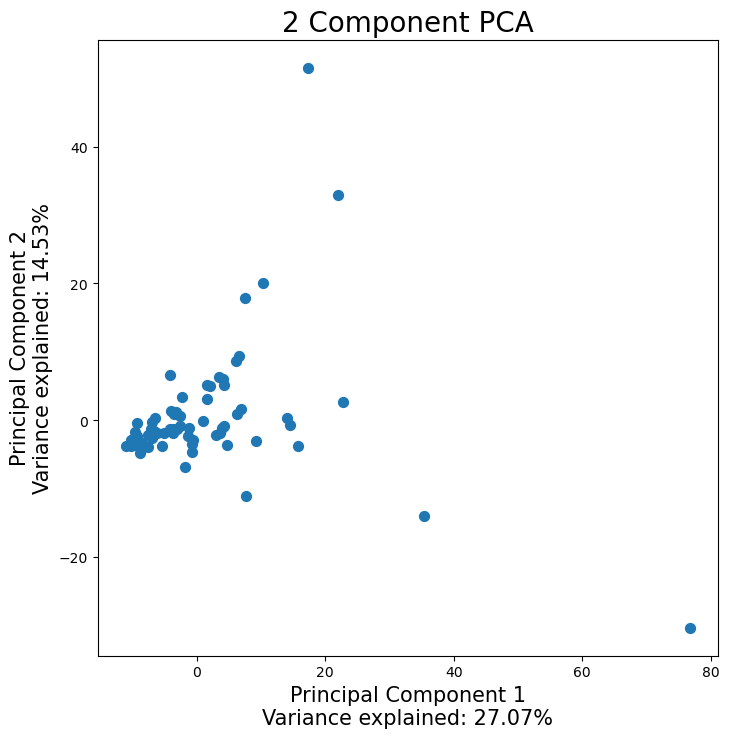

In [ ]:
PCA_analysis(normalized_data)

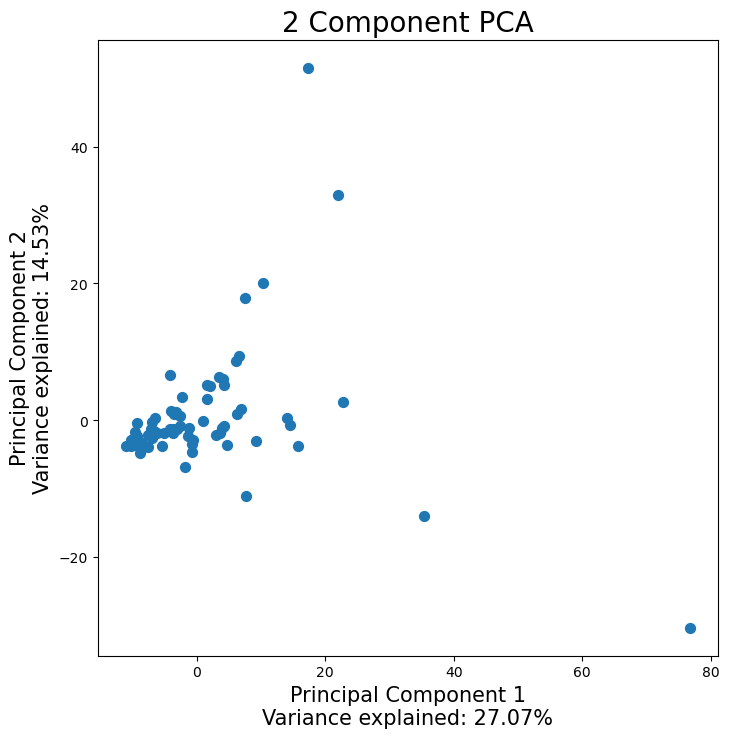

In [ ]:
variance_explained

array([0.92461872, 0.05306648])

In [ ]:
data

,Patient ID,Muscle loss,"1,6-Anhydro-beta-D-glucose",1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
0,PIF_178,cachexic,40.85,65.37,18.73,26.05,71.52,1480.3,56.83,10.07,...,259.82,290.03,111.05,86.49,72.24,237.46,135.64,51.94,157.59,160.77
1,PIF_087,cachexic,62.18,340.36,24.29,41.68,67.36,116.75,43.82,79.84,...,83.1,167.34,46.99,109.95,192.48,333.62,376.15,217.02,307.97,130.32
2,PIF_090,cachexic,270.43,64.72,12.18,65.37,23.81,14.3,5.64,23.34,...,82.27,60.34,31.5,59.15,2164.62,330.3,86.49,58.56,145.47,83.93
3,NETL_005_V1,cachexic,154.47,52.98,172.43,74.44,1199.91,555.57,175.91,25.03,...,235.1,323.76,30.57,102.51,125.21,1863.11,247.15,75.94,249.64,254.68
4,PIF_115,cachexic,22.2,73.7,15.64,83.93,33.12,29.67,76.71,69.41,...,103.54,142.59,44.26,160.77,186.79,101.49,749.95,98.49,84.77,79.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NETCR_019_V2,control,35.16,52.46,13.87,44.26,99.48,208.51,11.25,6.49,...,46.06,45.15,62.18,33.45,62.8,103.54,78.26,18.17,871.31,84.77
73,NETL_012_V1,control,16.95,15.8,10.49,22.42,62.8,10.91,6.96,3.46,...,21.33,21.33,31.19,13.2,14.3,36.23,11.59,12.3,53.52,44.7
74,NETL_012_V2,control,9.39,14.01,5.16,23.57,46.99,13.33,3.35,2.69,...,14.88,15.18,39.65,13.74,21.76,40.85,30.88,8.5,90.02,28.22
75,NETL_003_V1,control,37.71,18.17,26.05,15.03,23.34,33.45,6.05,5.26,...,17.46,29.96,13.46,14.59,36.97,90.92,17.64,12.43,897.85,90.02


In [ ]:
from metabolomics_analysis_tools.data_preprocessing import normalization as norm

In [ ]:
data_normalized=norm.normalize_by_median(data)
data_normalized
grouped_data=data_normalized.iloc[:,1:]

In [ ]:
grouped_data

,Muscle loss,"1,6-Anhydro-beta-D-glucose",1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
0,cachexic,0.895833,1.786066,1.78551,0.802526,1.296827,65.355408,4.857265,0.80239,3.935291,...,5.529262,4.806596,4.054399,2.611413,1.433333,1.84049,1.733197,1.935171,0.970442,2.339494
1,cachexic,1.363596,9.299454,2.315539,1.284042,1.221396,5.154525,3.745299,6.361753,2.559953,...,1.768461,2.773285,1.71559,3.319746,3.819048,2.585801,4.806415,8.085693,1.896484,1.896391
2,cachexic,5.930482,1.768306,1.161106,2.013863,0.431732,0.631347,0.482051,1.859761,4.618066,...,1.750798,1.0,1.150055,1.78593,42.94881,2.560068,1.105162,2.181818,0.895806,1.221333
3,cachexic,3.3875,1.447541,16.43756,2.293284,21.757208,24.528477,15.035043,1.994422,2.857599,...,5.003192,5.365595,1.116101,3.095109,2.484325,14.440474,3.158063,2.829359,1.537287,3.706054
4,cachexic,0.486842,2.013661,1.490944,2.585644,0.600544,1.309934,6.55641,5.530677,1.150246,...,2.203448,2.363109,1.615918,4.854167,3.706151,0.786622,9.582801,3.669523,0.522015,1.161816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,control,0.771053,1.433333,1.322212,1.363524,1.803808,9.20574,0.961538,0.517131,1.24606,...,0.980209,0.74826,2.270172,1.009964,1.246032,0.802511,1.0,0.676975,5.36554,1.233556
73,control,0.371711,0.431694,1.0,0.690696,1.138713,0.481678,0.594872,0.275697,1.138791,...,0.453926,0.353497,1.138737,0.398551,0.28373,0.280809,0.148096,0.458271,0.329577,0.650466
74,control,0.205921,0.382787,0.491897,0.726124,0.85204,0.588521,0.286325,0.214343,0.5712,...,0.316663,0.251574,1.447609,0.414855,0.431746,0.316618,0.394582,0.316692,0.554344,0.410652
75,control,0.826974,0.496448,2.483317,0.463031,0.423209,1.476821,0.517094,0.419124,0.733458,...,0.371568,0.49652,0.49142,0.440519,0.733532,0.704697,0.225403,0.463115,5.528973,1.309953


/var/folders/mg/5636bm150pnfpzs4pk6rc0y40000gn/T/ipykernel_54774/934586372.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data.iloc[:, 1:] = grouped_data.iloc[:, 1:].astype(float)
/var/folders/mg/5636bm150pnfpzs4pk6rc0y40000gn/T/ipykernel_54774/934586372.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_grouped_data = result_grouped_data.append({
/var/folders/mg/5636bm150pnfpzs4pk6rc0y40000gn/T/ipykernel_54774/934586372.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_grouped_data = result_grouped_data.append({
/var/folders/mg/5636bm150pnfpzs4pk6rc0y40000gn/T/ipykernel_54774/934586372.py:32: Fu

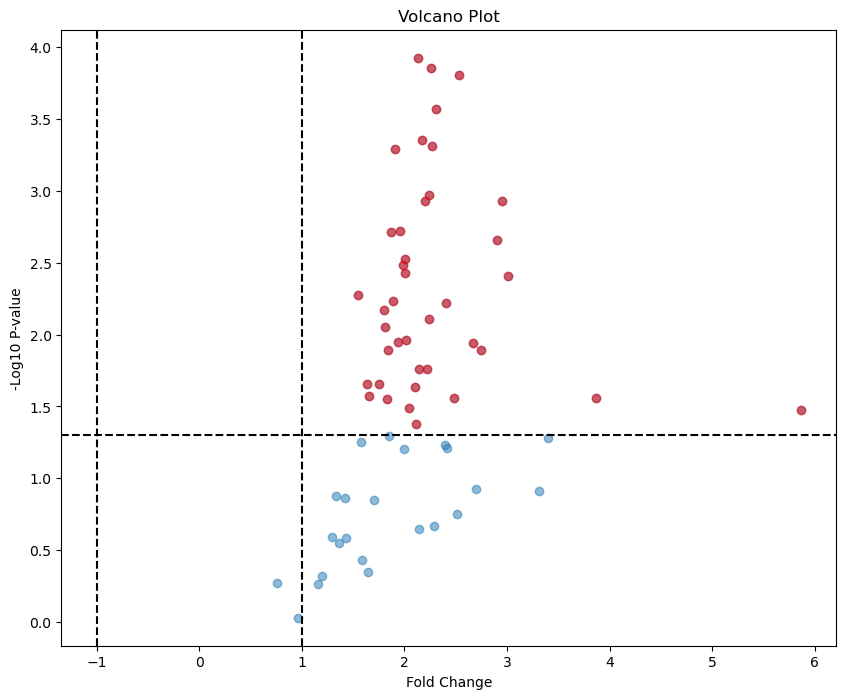

In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multitest import multipletests

# convert the data to float
grouped_data.iloc[:, 1:] = grouped_data.iloc[:, 1:].astype(float)
# set significance threshold and fold change threshold
sig_threshold = 0.05
fold_change_threshold = 1.5

# create a new DataFrame to store the results
result_grouped_data = pd.DataFrame(columns=['Metabolite', 'Fold Change', 'P-value', 'FDR'])

# iterate over each feature
for col in grouped_data.iloc[:, 1:]:
    group_A = grouped_data[grouped_data['Muscle loss'] == 'control'][col]
    group_B = grouped_data[grouped_data['Muscle loss'] == 'cachexic'][col]
    
    # perform a two-sample t-test for each feature
    t_stat, p_val = stats.ttest_ind(group_A, group_B)
    
    # calculate the fold change
    mean_A = group_A.mean()
    mean_B = group_B.mean()
    fold_change = mean_B / mean_A
    
    # correct the p-value for multiple testing using Benjamini-Hochberg procedure
    p_vals = [p_val]
    corrected_p_vals = multipletests(p_vals, method='fdr_bh')[1][0]
    
    # add the results to the result DataFrame
    result_grouped_data = result_grouped_data.append({
        'Metabolite': col,
        'Fold Change': fold_change,
        'P-value': p_val,
        'FDR': corrected_p_vals
    }, ignore_index=True)

# filter significant features based on FDR and fold change threshold
sig_features = result_grouped_data[(result_grouped_data['FDR'] < sig_threshold) & (abs(result_grouped_data['Fold Change']) > fold_change_threshold)]

# plot volcano plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(result_grouped_data['Fold Change'], -1 * np.log10(result_grouped_data['P-value']), alpha=0.5)
ax.scatter(sig_features['Fold Change'], -1 * np.log10(sig_features['P-value']), color='red', alpha=0.5)
ax.axvline(x=1, color='black', linestyle='--')
ax.axvline(x=-1, color='black', linestyle='--')
ax.axhline(y=-np.log10(sig_threshold), color='black', linestyle='--')
ax.set_xlabel('Fold Change')
ax.set_ylabel('-Log10 P-value')
ax.set_title('Volcano Plot')
plt.show()


In [ ]:
# iterate over each feature
for col in grouped_data.columns[:-1]:
    group_A = grouped_data[grouped_data['Muscle loss'] == 'control'][col]
    group_B = grouped_data[grouped_data['Muscle loss'] == 'cachexic'][col]
    
    # perform a two-sample t-test for each feature
    t_stat, p_val = stats.ttest_ind(group_A, group_B)

In [ ]:
grouped_data = pd.DataFrame({
    'Feature_1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature_2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Feature_3': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'Group': ['cachexic', 'cachexic', 'cachexic', 'cachexic', 'control', 'control', 'control', 'control', 'control', 'control']
})

grouped_data.columns[:-1]

Index(['Feature_1', 'Feature_2', 'Feature_3'], dtype='object')

In [ ]:
grouped_data

,Feature_1,Feature_2,Feature_3,Group
0,1,10,100,cachexic
1,2,20,200,cachexic
2,3,30,300,cachexic
3,4,40,400,cachexic
4,5,50,500,control
5,6,60,600,control
6,7,70,700,control
7,8,80,800,control
8,9,90,900,control
9,10,100,1000,control


In [ ]:
grouped_data.columns[:-1]

Index(['Feature_1', 'Feature_2', 'Feature_3'], dtype='object')

In [ ]:
grouped_data

,Muscle loss,"1,6-Anhydro-beta-D-glucose",1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
0,cachexic,0.895833,1.786066,1.78551,0.802526,1.296827,65.355408,4.857265,0.80239,3.935291,...,5.529262,4.806596,4.054399,2.611413,1.433333,1.84049,1.733197,1.935171,0.970442,2.339494
1,cachexic,1.363596,9.299454,2.315539,1.284042,1.221396,5.154525,3.745299,6.361753,2.559953,...,1.768461,2.773285,1.71559,3.319746,3.819048,2.585801,4.806415,8.085693,1.896484,1.896391
2,cachexic,5.930482,1.768306,1.161106,2.013863,0.431732,0.631347,0.482051,1.859761,4.618066,...,1.750798,1.0,1.150055,1.78593,42.94881,2.560068,1.105162,2.181818,0.895806,1.221333
3,cachexic,3.3875,1.447541,16.43756,2.293284,21.757208,24.528477,15.035043,1.994422,2.857599,...,5.003192,5.365595,1.116101,3.095109,2.484325,14.440474,3.158063,2.829359,1.537287,3.706054
4,cachexic,0.486842,2.013661,1.490944,2.585644,0.600544,1.309934,6.55641,5.530677,1.150246,...,2.203448,2.363109,1.615918,4.854167,3.706151,0.786622,9.582801,3.669523,0.522015,1.161816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,control,0.771053,1.433333,1.322212,1.363524,1.803808,9.20574,0.961538,0.517131,1.24606,...,0.980209,0.74826,2.270172,1.009964,1.246032,0.802511,1.0,0.676975,5.36554,1.233556
73,control,0.371711,0.431694,1.0,0.690696,1.138713,0.481678,0.594872,0.275697,1.138791,...,0.453926,0.353497,1.138737,0.398551,0.28373,0.280809,0.148096,0.458271,0.329577,0.650466
74,control,0.205921,0.382787,0.491897,0.726124,0.85204,0.588521,0.286325,0.214343,0.5712,...,0.316663,0.251574,1.447609,0.414855,0.431746,0.316618,0.394582,0.316692,0.554344,0.410652
75,control,0.826974,0.496448,2.483317,0.463031,0.423209,1.476821,0.517094,0.419124,0.733458,...,0.371568,0.49652,0.49142,0.440519,0.733532,0.704697,0.225403,0.463115,5.528973,1.309953


In [ ]:
grouped_data['cachexic']

KeyError: 'cachexic'

In [ ]:
for col in grouped_data.iloc[:, 1:]:
    print (col)

1,6-Anhydro-beta-D-glucose
1-Methylnicotinamide
2-Aminobutyrate
2-Hydroxyisobutyrate
2-Oxoglutarate
3-Aminoisobutyrate
3-Hydroxybutyrate
3-Hydroxyisovalerate
3-Indoxylsulfate
4-Hydroxyphenylacetate
Acetate
Acetone
Adipate
Alanine
Asparagine
Betaine
Carnitine
Citrate
Creatine
Creatinine
Dimethylamine
Ethanolamine
Formate
Fucose
Fumarate
Glucose
Glutamine
Glycine
Glycolate
Guanidoacetate
Hippurate
Histidine
Hypoxanthine
Isoleucine
Lactate
Leucine
Lysine
Methylamine
Methylguanidine
N,N-Dimethylglycine
O-Acetylcarnitine
Pantothenate
Pyroglutamate
Pyruvate
Quinolinate
Serine
Succinate
Sucrose
Tartrate
Taurine
Threonine
Trigonelline
Trimethylamine N-oxide
Tryptophan
Tyrosine
Uracil
Valine
Xylose
cis-Aconitate
myo-Inositol
trans-Aconitate
pi-Methylhistidine
tau-Methylhistidine


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# calculate log fold change (M value)
grouped_data['M'] = np.log2(grouped_data['cachexic']) - np.log2(grouped_data['control'])

# calculate average expression (A value)
grouped_data['A'] = (np.log2(grouped_data['cachexic']) + np.log2(grouped_data['control'])) / 2

# plot MA plot
fig, ax = plt.subplots()
ax.scatter(grouped_data['A'], grouped_data['M'], s=5)
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('A value')
ax.set_ylabel('M value')
ax.set_title('MA plot')
plt.show()


KeyError: 'cachexic'

In [ ]:
grouped_data

,Muscle loss,"1,6-Anhydro-beta-D-glucose",1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
0,cachexic,0.895833,1.786066,1.78551,0.802526,1.296827,65.355408,4.857265,0.80239,3.935291,...,5.529262,4.806596,4.054399,2.611413,1.433333,1.84049,1.733197,1.935171,0.970442,2.339494
1,cachexic,1.363596,9.299454,2.315539,1.284042,1.221396,5.154525,3.745299,6.361753,2.559953,...,1.768461,2.773285,1.71559,3.319746,3.819048,2.585801,4.806415,8.085693,1.896484,1.896391
2,cachexic,5.930482,1.768306,1.161106,2.013863,0.431732,0.631347,0.482051,1.859761,4.618066,...,1.750798,1.0,1.150055,1.78593,42.94881,2.560068,1.105162,2.181818,0.895806,1.221333
3,cachexic,3.3875,1.447541,16.43756,2.293284,21.757208,24.528477,15.035043,1.994422,2.857599,...,5.003192,5.365595,1.116101,3.095109,2.484325,14.440474,3.158063,2.829359,1.537287,3.706054
4,cachexic,0.486842,2.013661,1.490944,2.585644,0.600544,1.309934,6.55641,5.530677,1.150246,...,2.203448,2.363109,1.615918,4.854167,3.706151,0.786622,9.582801,3.669523,0.522015,1.161816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,control,0.771053,1.433333,1.322212,1.363524,1.803808,9.20574,0.961538,0.517131,1.24606,...,0.980209,0.74826,2.270172,1.009964,1.246032,0.802511,1.0,0.676975,5.36554,1.233556
73,control,0.371711,0.431694,1.0,0.690696,1.138713,0.481678,0.594872,0.275697,1.138791,...,0.453926,0.353497,1.138737,0.398551,0.28373,0.280809,0.148096,0.458271,0.329577,0.650466
74,control,0.205921,0.382787,0.491897,0.726124,0.85204,0.588521,0.286325,0.214343,0.5712,...,0.316663,0.251574,1.447609,0.414855,0.431746,0.316618,0.394582,0.316692,0.554344,0.410652
75,control,0.826974,0.496448,2.483317,0.463031,0.423209,1.476821,0.517094,0.419124,0.733458,...,0.371568,0.49652,0.49142,0.440519,0.733532,0.704697,0.225403,0.463115,5.528973,1.309953


In [ ]:
grouped_data[grouped_data['Muscle loss'] == 'cachexic'].iloc[:, 1:].mean()

1,6-Anhydro-beta-D-glucose    2.822126
1-Methylnicotinamide          1.927985
2-Aminobutyrate               2.256354
2-Hydroxyisobutyrate          1.332029
2-Oxoglutarate                3.320225
                                ...   
trans-Aconitate               1.818705
pi-Methylhistidine            2.719091
tau-Methylhistidine           1.537655
logFC                              NaN
mean                          0.784666
Length: 65, dtype: float64

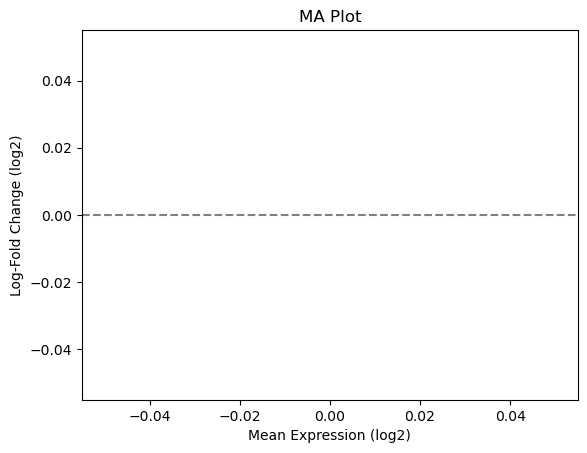

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Calculate the log-fold change and mean expression
grouped_data['logFC'] = np.log2(grouped_data[grouped_data['Muscle loss'] == 'cachexic'].iloc[:, 1:].mean() / grouped_data[grouped_data['Muscle loss'] == 'control'].iloc[:, 1:].mean())
grouped_data['mean'] = np.log2(grouped_data.iloc[:, 1:].mean(axis=1))

# Create the MA plot
plt.scatter(grouped_data['mean'], grouped_data['logFC'], s=10, alpha=0.5, color='black')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Mean Expression (log2)')
plt.ylabel('Log-Fold Change (log2)')
plt.title('MA Plot')
plt.show()


In [ ]:
# Calculate the log-fold change and mean expression
cachexic_mean = grouped_data[grouped_data['Muscle loss'] == 'cachexic'].iloc[:, 1:].mean()
control_mean = grouped_data[grouped_data['Muscle loss'] == 'control'].iloc[:, 1:].mean()
log_fold_change = np.log2(cachexic_mean / control_mean)
grouped_data['mean'] = np.log2(grouped_data.iloc[:, 1:].mean(axis=1))

# Print the DataFrame to check the values


# Create the MA plot
plt.scatter(grouped_data['mean'], grouped_data['logFC'], s=10, alpha=0.5, color='black')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Mean Expression (log2)')
plt.ylabel('Log-Fold Change (log2)')
plt.title('MA Plot')
plt.show()

/Users/yuzhijian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
cachexic_mean.size, control_mean.size

(65, 65)

In [ ]:
# Calculate the log-fold change and mean expression
cachexic_mean = grouped_data[grouped_data['Muscle loss'] == 'cachexic'].iloc[:, 1:].mean()
control_mean = grouped_data[grouped_data['Muscle loss'] == 'control'].iloc[:, 1:].mean()
logFC = np.log2(cachexic_mean / control_mean)
data_mean = np.log2(grouped_data.iloc[:, 1:].mean(axis=0))
# Create the MA plot
plt.scatter(data_mean, logFC, s=10, alpha=0.5, color='black')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Mean Expression (log2)')
plt.ylabel('Log-Fold Change (log2)')
plt.title('MA Plot')
plt.show()

In [ ]:
cachexic_mean

1,6-Anhydro-beta-D-glucose    2.822126
1-Methylnicotinamide          1.927985
2-Aminobutyrate               2.256354
2-Hydroxyisobutyrate          1.332029
2-Oxoglutarate                3.320225
                                ...   
cis-Aconitate                 2.139401
myo-Inositol                  2.323507
trans-Aconitate               1.818705
pi-Methylhistidine            2.719091
tau-Methylhistidine           1.537655
Length: 63, dtype: float64

In [ ]:
cachexic_mean.size, control_mean.size

(63, 63)

In [128]:
logFC = np.log2(cachexic_mean / control_mean)

In [129]:
logFC.size

63

In [130]:
mean = np.log2(grouped_data.iloc[:, 1:].mean(axis=0))

In [131]:
mean.size

63

In [114]:
mean = np.log2(grouped_data.iloc[:, 1:].mean(axis=0))

In [113]:
grouped_data.iloc[:, 1:].mean(axis=0)

1,6-Anhydro-beta-D-glucose    2.316456
1-Methylnicotinamide          1.955564
2-Aminobutyrate               1.731148
2-Hydroxyisobutyrate          1.147586
2-Oxoglutarate                2.630773
                                ...   
trans-Aconitate               1.513800
pi-Methylhistidine            2.280241
tau-Methylhistidine           1.305106
logFC                              NaN
mean                          0.329511
Length: 65, dtype: float64

In [108]:
mean.size

77

In [110]:
mean

0     2.018023
1     2.184030
2     1.787613
3     2.898073
4     1.815149
        ...   
72    0.727344
73   -0.871099
74   -0.805781
75    0.124212
76   -0.590061
Length: 77, dtype: float64

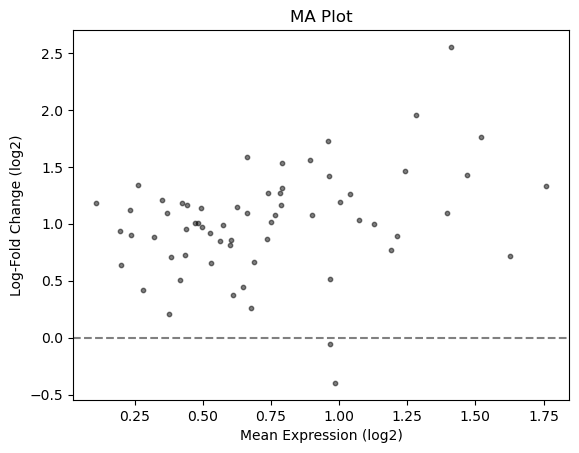

In [132]:

# Create the MA plot
plt.scatter(mean, logFC, s=10, alpha=0.5, color='black')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Mean Expression (log2)')
plt.ylabel('Log-Fold Change (log2)')
plt.title('MA Plot')
plt.show()

In [86]:
logFC.size

65

In [87]:
mean.size

77

In [84]:
grouped_data['logFC']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
72   NaN
73   NaN
74   NaN
75   NaN
76   NaN
Name: logFC, Length: 77, dtype: float64

In [82]:
print("cachexic_mean has NaN:", cachexic_mean.isna().any())

cachexic_mean has NaN: True


In [79]:
print(grouped_data['logFC'])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
72   NaN
73   NaN
74   NaN
75   NaN
76   NaN
Name: logFC, Length: 77, dtype: float64


In [52]:
grouped_data['log2FC'] = grouped_data['cachexic'].apply(lambda x: np.log2(x / grouped_data['control'].mean()))
grouped_data['mean'] = (grouped_data['cachexic'] + grouped_data['control']) / 2


KeyError: 'cachexic'

In [ ]:
plt.scatter(grouped_data['mean'], grouped_data['log2FC'], alpha=0.5, s=10)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Average Expression')
plt.ylabel('Log2 Fold Change')
plt.title('MA Plot')
plt.show()

In [ ]:
# hello_psg.py

import PySimpleGUI as sg

layout = [[sg.Text("Hello from PySimpleGUI")], [sg.Button("OK")]]

# Create the window
window = sg.Window("Demo", layout)

# Create an event loop
while True:
    event, values = window.read()
    # End program if user closes window or
    # presses the OK button
    if event == "OK" or event == sg.WIN_CLOSED:
        break

window.close()